In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../')
from preprocessing.getdata import *

In [73]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, recall_score, precision_score

In [74]:
df_o = get_csvdata(drop_young=False, drop_contradictions=False, multiclass=True)
df_a = get_csvdata_ADNI(drop_MCI=False, multiclass=True)
df= pd.concat([df_o, df_a], axis=0)

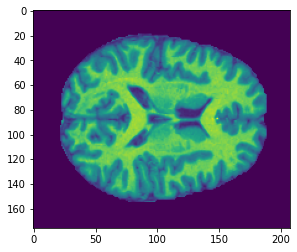

In [85]:
plt.imshow(get_slices(df_o["ID"].sample(1), m=90, dim=2)[0])


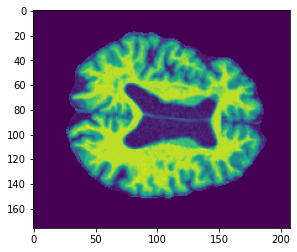

In [83]:
plt.imshow(get_slices_ADNI_new(df_a["ID"].sample(1), m=90, dim=2)[0])

In [4]:
file= "results_both_datasets.csv"
df_result= pd.read_csv("../modelling/predictions/"+file)
df_result
df_num = pd.read_csv("../modelling/tables/numerical_brian_only_predictions.csv")

In [6]:
df_result

,Unnamed: 0,ID,y_test,y_pred
0,0,OAS1_0145_MR1,0,0.002277
1,1,OAS1_0019_MR1,0,0.605508
2,2,OAS1_0372_MR1,0,0.006064
3,3,OAS1_0018_MR1,0,0.001319
4,4,OAS1_0266_MR1,0,0.060436
...,...,...,...,...
312,312,099_S_0352,0,0.554856
313,313,027_S_0116,1,0.217359
314,314,128_S_0740,1,0.891688
315,315,021_S_0626,1,0.630802


In [7]:
df_result = df_result.merge(df, on="ID", how="left")
df_num = df_result.merge(df_num, on="ID", how="left")
df_result= df_result[["ID", "Age", "label", "y_test", "y_pred", "dataset", "Sex", "M/F"]]

In [8]:
df_result

,ID,Age,label,y_test,y_pred,dataset,Sex,M/F
0,OAS1_0145_MR1,34,CN,0,0.002277,OASIS,NaN,M
1,OAS1_0019_MR1,89,CN,0,0.605508,OASIS,NaN,F
2,OAS1_0372_MR1,59,CN,0,0.006064,OASIS,NaN,M
3,OAS1_0018_MR1,39,CN,0,0.001319,OASIS,NaN,M
4,OAS1_0266_MR1,51,CN,0,0.060436,OASIS,NaN,M
...,...,...,...,...,...,...,...,...
312,099_S_0352,77,CN,0,0.554856,ADNI,F,NaN
313,027_S_0116,79,MCI,1,0.217359,ADNI,M,NaN
314,128_S_0740,72,AD,1,0.891688,ADNI,M,NaN
315,021_S_0626,83,MCI,1,0.630802,ADNI,M,NaN


In [9]:
df_result["Sex"].fillna(df_result["M/F"], inplace=True)
df_num

,Unnamed: 0,ID,y_test,y_pred,M/F,Age_x,Educ,SES,MMSE,CDR,...,WholeBrain,Entorhinal,Imputed,Sex_y,label_y,Train,y_test_num,y_pred_num,probs1_num,classification
0,0,OAS1_0145_MR1,0,0.002277,M,34,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,OAS1_0019_MR1,0,0.605508,F,89,5.0,1.0,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,OAS1_0372_MR1,0,0.006064,M,59,3.0,2.0,29.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,OAS1_0018_MR1,0,0.001319,M,39,3.0,4.0,28.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,OAS1_0266_MR1,0,0.060436,M,51,5.0,1.0,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,312,099_S_0352,0,0.554856,NaN,77,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,313,027_S_0116,1,0.217359,NaN,79,NaN,NaN,NaN,NaN,...,928173.0,4048.0,0.0,M,1.0,False,1.0,1.0,0.507002,TP
314,314,128_S_0740,1,0.891688,NaN,72,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,315,021_S_0626,1,0.630802,NaN,83,NaN,NaN,NaN,NaN,...,959442.0,3688.0,0.0,M,1.0,False,1.0,1.0,0.754532,TP


In [10]:
df_num.dropna(subset=['Imputed'],inplace=True, axis=0)
df_num

,Unnamed: 0,ID,y_test,y_pred,M/F,Age_x,Educ,SES,MMSE,CDR,...,WholeBrain,Entorhinal,Imputed,Sex_y,label_y,Train,y_test_num,y_pred_num,probs1_num,classification
112,112,126_S_0784,1,0.653371,NaN,76,NaN,NaN,NaN,NaN,...,924107.0,3260.6,1.0,F,1.0,False,1.0,1.0,0.561221,TP
114,114,002_S_0413,0,0.319268,NaN,76,NaN,NaN,NaN,NaN,...,1052840.0,4133.0,0.0,F,0.0,False,0.0,1.0,0.513296,FP
115,115,021_S_0337,0,0.745677,NaN,76,NaN,NaN,NaN,NaN,...,1060960.0,4464.0,0.0,M,0.0,False,0.0,1.0,0.564653,FP
121,121,033_S_0741,0,0.688452,NaN,80,NaN,NaN,NaN,NaN,...,1050900.0,2423.0,0.0,F,0.0,False,0.0,1.0,0.774696,FP
126,126,027_S_1081,1,0.815911,NaN,85,NaN,NaN,NaN,NaN,...,941319.0,3301.4,1.0,M,1.0,True,1.0,1.0,0.875047,TP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,306,041_S_0262,0,0.657573,NaN,86,NaN,NaN,NaN,NaN,...,965385.0,3588.0,0.0,M,0.0,False,0.0,0.0,0.431179,TN
309,309,033_S_1285,1,0.621193,NaN,80,NaN,NaN,NaN,NaN,...,1025970.0,3224.0,0.0,F,1.0,True,1.0,1.0,0.671668,TP
311,311,137_S_0301,0,0.581623,NaN,74,NaN,NaN,NaN,NaN,...,984945.0,3704.0,0.0,F,0.0,False,0.0,0.0,0.314002,TN
313,313,027_S_0116,1,0.217359,NaN,79,NaN,NaN,NaN,NaN,...,928173.0,4048.0,0.0,M,1.0,False,1.0,1.0,0.507002,TP


In [11]:
df_num["ensemble"] = (df_num["y_pred"] + df_num["probs1_num"]) /2

In [12]:
df_num["end_pred"] = (df_num["ensemble"]+0).round()
df_num["cnn_pred"] = (df_num["y_pred"]+0).round()

In [13]:
df_num[df_num["end_pred"] != df_num["cnn_pred"]]

,Unnamed: 0,ID,y_test,y_pred,M/F,Age_x,Educ,SES,MMSE,CDR,...,Sex_y,label_y,Train,y_test_num,y_pred_num,probs1_num,classification,ensemble,end_pred,cnn_pred
140,140,023_S_1104,1,0.444016,NaN,65,NaN,NaN,NaN,NaN,...,F,1.0,True,1.0,1.0,0.774049,TP,0.609032,1.0,0.0
160,160,116_S_0890,1,0.232317,NaN,60,NaN,NaN,NaN,NaN,...,F,1.0,True,1.0,1.0,0.888873,TP,0.560595,1.0,0.0
166,166,023_S_0078,1,0.422766,NaN,76,NaN,NaN,NaN,NaN,...,F,1.0,False,1.0,1.0,0.616530,TP,0.519648,1.0,0.0
258,258,052_S_0989,1,0.335844,NaN,64,NaN,NaN,NaN,NaN,...,F,1.0,True,1.0,1.0,0.873250,TP,0.604547,1.0,0.0
283,283,941_S_1203,0,0.489698,NaN,83,NaN,NaN,NaN,NaN,...,M,0.0,False,0.0,1.0,0.511050,FP,0.500374,1.0,0.0
311,311,137_S_0301,0,0.581623,NaN,74,NaN,NaN,NaN,NaN,...,F,0.0,False,0.0,0.0,0.314002,TN,0.447812,0.0,1.0


In [14]:
# before ensemble
print(confusion_matrix(df_num["y_test"], df_num["cnn_pred"]))
print(accuracy_score(df_num["y_test"], df_num["cnn_pred"]))
print(recall_score(df_num["y_test"], df_num["cnn_pred"]))
print(precision_score(df_num["y_test"], df_num["cnn_pred"]))

[[ 4 15]
 [ 6 41]]
0.6818181818181818
0.8723404255319149
0.7321428571428571


In [15]:
#after ensemble
print(confusion_matrix(df_num["y_test"], df_num["end_pred"]))
print(accuracy_score(df_num["y_test"], df_num["end_pred"]))
print(recall_score(df_num["y_test"], df_num["end_pred"]))
print(precision_score(df_num["y_test"], df_num["end_pred"]))

[[ 4 15]
 [ 2 45]]
0.7424242424242424
0.9574468085106383
0.75


In [16]:
df_result.drop("M/F", inplace=True, axis=1)
df_result

,ID,Age,label,y_test,y_pred,dataset,Sex
0,OAS1_0145_MR1,34,CN,0,0.002277,OASIS,M
1,OAS1_0019_MR1,89,CN,0,0.605508,OASIS,F
2,OAS1_0372_MR1,59,CN,0,0.006064,OASIS,M
3,OAS1_0018_MR1,39,CN,0,0.001319,OASIS,M
4,OAS1_0266_MR1,51,CN,0,0.060436,OASIS,M
...,...,...,...,...,...,...,...
312,099_S_0352,77,CN,0,0.554856,ADNI,F
313,027_S_0116,79,MCI,1,0.217359,ADNI,M
314,128_S_0740,72,AD,1,0.891688,ADNI,M
315,021_S_0626,83,MCI,1,0.630802,ADNI,M


In [17]:
df_result["prediction"] = (df_result["y_pred"]+0.1).round()

In [18]:
df_result

,ID,Age,label,y_test,y_pred,dataset,Sex,prediction
0,OAS1_0145_MR1,34,CN,0,0.002277,OASIS,M,0.0
1,OAS1_0019_MR1,89,CN,0,0.605508,OASIS,F,1.0
2,OAS1_0372_MR1,59,CN,0,0.006064,OASIS,M,0.0
3,OAS1_0018_MR1,39,CN,0,0.001319,OASIS,M,0.0
4,OAS1_0266_MR1,51,CN,0,0.060436,OASIS,M,0.0
...,...,...,...,...,...,...,...,...
312,099_S_0352,77,CN,0,0.554856,ADNI,F,1.0
313,027_S_0116,79,MCI,1,0.217359,ADNI,M,0.0
314,128_S_0740,72,AD,1,0.891688,ADNI,M,1.0
315,021_S_0626,83,MCI,1,0.630802,ADNI,M,1.0


In [19]:
TP = df_result[(df_result.y_test == 1) & (df_result.prediction == 1)]
FP = df_result[(df_result.y_test == 0) & (df_result.prediction == 1)]
TN = df_result[(df_result.y_test == 0) & (df_result.prediction == 0)]
FN = df_result[(df_result.y_test == 1) & (df_result.prediction == 0)]

acc =round((TP.shape[0]+TN.shape[0])/(TP.shape[0]+FP.shape[0]+TN.shape[0]+FN.shape[0]),2)
recall= round((TP.shape[0])/(TP.shape[0]+FN.shape[0]),2)
specificity = round((TN.shape[0])/(TN.shape[0]+FP.shape[0]),2)
bal_acc = round((recall+ specificity )/2, 2)

try:
    precision= round((TP.shape[0])/(TP.shape[0]+FP.shape[0]),2)
except:
    precision = 0.0
print(f"Accuracy is {acc}, \nRecall is {recall}, \nPrecision is {precision}, \nBalanced Accuracy is {bal_acc}")

Accuracy is 0.76, 
Recall is 0.94, 
Precision is 0.72, 
Balanced Accuracy is 0.74


In [20]:
def classification(row):
    if (row.y_test == 1) & (row .prediction == 1):
        return "TP"
    if (row.y_test == 0) & (row .prediction == 1):
        return "FP"
    if (row.y_test == 0) & (row .prediction == 0):
        return "TN"
    if (row.y_test == 1) & (row .prediction == 0):
        return "FN"

df_result["classification"] = df_result.apply(lambda row: classification(row), axis=1)

[Text(0, 0.5, 'CN'), Text(0, 1.5, 'MCI/AD')]

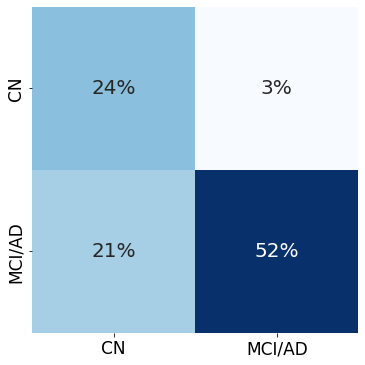

In [59]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(group_names).reshape(2,2)

mat = confusion_matrix(df_result.y_test, df_result.prediction.round())
ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(mat.T/317, square=True, annot=True, fmt='.0%', cbar=False, cmap="Blues", annot_kws={"size":20})
#plt.xlabel(' \nTrue Label', fontsize=15)
#plt.ylabel('Predicted Label\n ', fontsize=15)
#ax.set_xticklabels(["CN", "MCI/AD"], size=17)
#ax.set_yticklabels(["CN", "MCI/AD"], size=17)

[Text(0, 0.5, 'CN'), Text(0, 1.5, 'MCI/AD')]

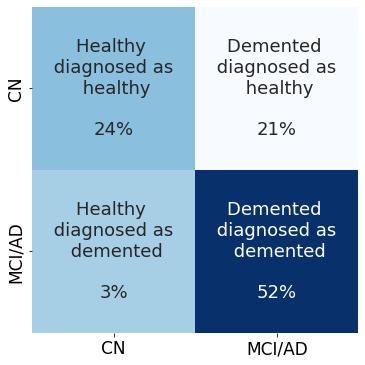

In [71]:
group_names = ["Healthy \n diagnosed as \n healthy\n ","Demented \n diagnosed as \n healthy\n ","Healthy \n diagnosed as \n demented\n ","Demented \n diagnosed as \n demented\n "]
group_percentages = ["{0:.0%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#labels = np.asarray(group_names).reshape(2,2)


mat = confusion_matrix(df_result.y_test, df_result.prediction.round())
ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(mat.T/317, square=True, annot=labels, fmt='', cbar=False, cmap="Blues", annot_kws={"size":18})

#plt.xlabel(' \nTrue Label', fontsize=16)
#plt.ylabel('Predicted Label\n ', fontsize=16)
ax.set_xticklabels(["CN", "MCI/AD"], size=17)
ax.set_yticklabels(["CN", "MCI/AD"], size=17)

[Text(0, 0.5, 'CN'), Text(0, 1.5, 'MCI/AD')]

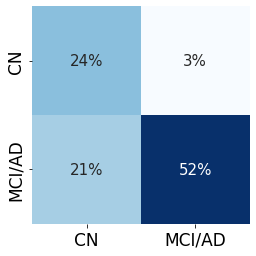

In [57]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(group_names).reshape(2,2)

mat = confusion_matrix(df_result.y_test, df_result.prediction.round())
ax = sns.heatmap(mat.T/317, square=True, annot=True, fmt='.0%', cbar=False, cmap="Blues", annot_kws={"size":15})
#plt.xlabel(' \nTrue Label', fontsize=15)
#plt.ylabel('Predicted Label\n ', fontsize=15)
ax.set_xticklabels(["CN", "MCI/AD"], size=17)
ax.set_yticklabels(["CN", "MCI/AD"], size=17)

[Text(0, 0.5, 'CN'), Text(0, 1.5, 'MCI/AD')]

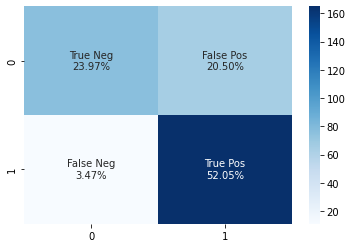

In [61]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt="", cmap='Blues')
ax.set_xticklabels(["CN", "MCI/AD"], size=12)
ax.set_yticklabels(["CN", "MCI/AD"], size=12)

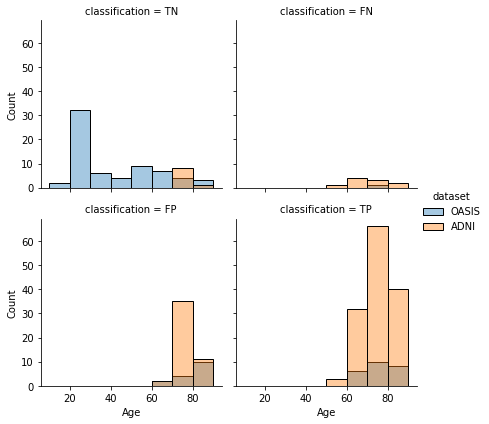

In [23]:
plot= sns.FacetGrid(data=df_result, col="classification", col_wrap=2, col_order=["TN", "FN", "FP", "TP"], hue="dataset", legend_out=True)
plot.map_dataframe(sns.histplot, x="Age", binrange=(10,90), binwidth=10, alpha=0.4)
plot.add_legend();

In [24]:
precision, recall, thresholds = precision_recall_curve(df_result["y_test"], df_result["y_pred"])

In [25]:
thresholds = np.append(thresholds, 1)

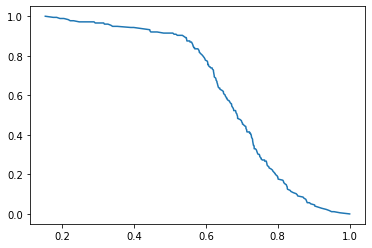

In [26]:
plt.plot(thresholds, recall)

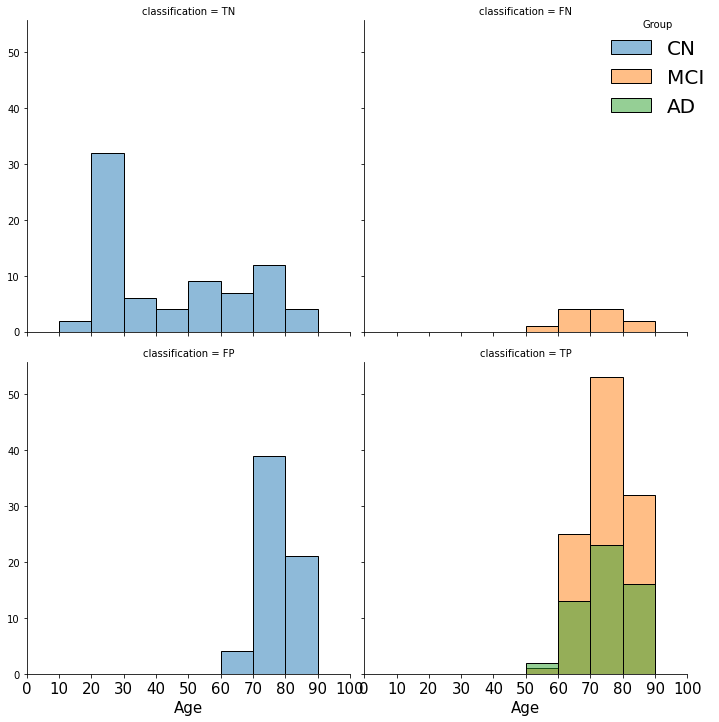

In [27]:
plot= sns.FacetGrid(data=df_result, col="classification", col_wrap=2, col_order=["TN", "FN", "FP", "TP"], hue="label", legend_out=True, height=5)
plot.map_dataframe(sns.histplot, x="Age", binrange=(10,90), binwidth=10, alpha=0.5)
plot.add_legend(fontsize=20, title= "Group", bbox_to_anchor= (0.9,0.9))
plot.set_xticklabels(fontsize=15)
plot.set_ylabels(fontsize=15)
plot.set_xlabels(fontsize=15)

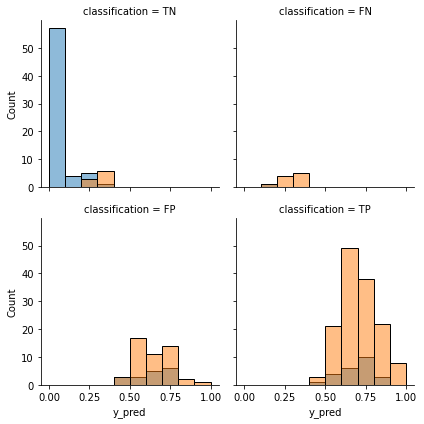

In [28]:
plot= sns.FacetGrid(data=df_result, col="classification", col_wrap=2, col_order=["TN", "FN", "FP", "TP"], hue="dataset")#, hue="dataset", legend_out=True)
plot.map_dataframe(sns.histplot, x="y_pred", binrange=(0,1), binwidth=0.1, alpha=0.5);

In [29]:
df = df_result.copy()
df["orig_order"] = df.index
df.sort_values("y_pred", inplace=True)
df= df.reset_index(drop=True)
df["order"] = df.index
df.sort_values("orig_order", inplace=True)
df= df.reset_index(drop=True)
df.drop("orig_order", axis=1, inplace=True)
df


,ID,Age,label,y_test,y_pred,dataset,Sex,prediction,classification,order
0,OAS1_0145_MR1,34,CN,0,0.002277,OASIS,M,0.0,TN,29
1,OAS1_0019_MR1,89,CN,0,0.605508,OASIS,F,1.0,FP,145
2,OAS1_0372_MR1,59,CN,0,0.006064,OASIS,M,0.0,TN,40
3,OAS1_0018_MR1,39,CN,0,0.001319,OASIS,M,0.0,TN,24
4,OAS1_0266_MR1,51,CN,0,0.060436,OASIS,M,0.0,TN,53
...,...,...,...,...,...,...,...,...,...,...
312,099_S_0352,77,CN,0,0.554856,ADNI,F,1.0,FP,115
313,027_S_0116,79,MCI,1,0.217359,ADNI,M,0.0,FN,64
314,128_S_0740,72,AD,1,0.891688,ADNI,M,1.0,TP,307
315,021_S_0626,83,MCI,1,0.630802,ADNI,M,1.0,TP,165


<AxesSubplot:xlabel='label', ylabel='count'>

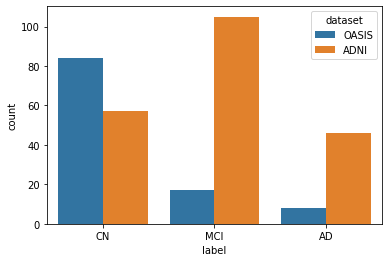

In [30]:
sns.countplot(data= df,  x="label", hue="dataset")

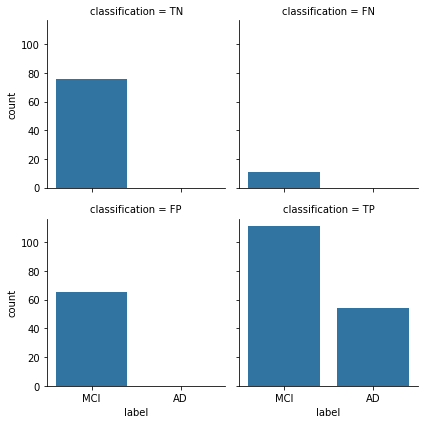

In [31]:
plot= sns.FacetGrid(data=df, col="classification", col_wrap=2, col_order=["TN", "FN", "FP", "TP"])
plot.map_dataframe(sns.countplot, x="label");

In [32]:
sys.path.append('../')
from preprocessing.getdata import *
IDs_o = df[df["dataset"]== "OASIS"]["ID"]
IDs_a = df[df["dataset"]== "ADNI"]["ID"]

imgs = get_slices_both(OASIS_IDs =IDs_o, ADNI_IDs =IDs_a, dim=2, m=90, normalize=True)
#imgs= get_slices(IDs_o, dim=2, m=90, normalize=False)
#imgs= get_slices_ADNI(IDs_a, dim=2, m=90, normalize=False)
imgs.shape

KeyboardInterrupt: 

In [ ]:
order= np.array(df["order"])
sort = order.argsort()
imgs_sorted= imgs[sort]

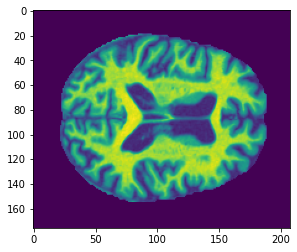

In [ ]:
#most confident CN
plt.imshow(imgs_sorted[284])

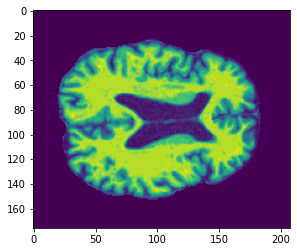

In [ ]:
#most confident AD
im = plt.imshow(imgs_sorted[-1])

In [ ]:
type(im)

matplotlib.image.AxesImage

In [ ]:
from matplotlib import animation


# generating gif out of slices of 3-dimensional numpy array
def generate_gif(numpy_3d_array, y_pred, path="test.gif"):
    fig = plt.figure()
    im = plt.imshow(numpy_3d_array[0, :, :],    # display first slice
                    animated=True,
                    cmap='Greys',               # color mapping
                    vmin=0, # lowest value in numpy_3d_array
                    vmax=1) # highest value in numpy_3d_array
    

    def init():
        im.set_data(numpy_3d_array[0, :, :])
        return im,

    def animate(i):
        im.set_array(numpy_3d_array[i, :, :])
        #plt.text(180,20, y_pred[i], fontsize=20)
        return im,

    # calling animation function of matplotlib
    anim = animation.FuncAnimation(fig,
                                   animate,
                                   init_func=init,
                                   frames=np.shape(numpy_3d_array)[0],  # amount of frames being animated
                                   interval=100,                       # update every x-milliseconds
                                   blit=True)
    anim.save(path)   # save as gif
    plt.show()

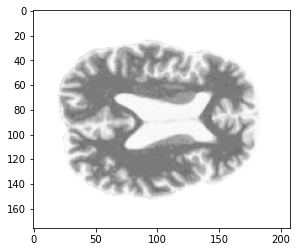

In [ ]:
os.makedirs("./gifs/", exist_ok=True)
generate_gif(imgs_sorted, y_pred=df["y_pred"], path="./gifs/"+file[:-4]+"final_model.gif")

In [ ]:
os.makedirs("../data/sorted_pngs/", exist_ok=True)
for i in range(imgs_sorted.shape[0]):
    plt.imsave(f"../data/sorted_pngs/img{i}.png", imgs_sorted[i], cmap="Greys")

In [ ]:
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>